In [14]:
import cv2
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [15]:

# Step 1: Read the picture and convert it to grayscale
image_path = r'C:\2.jpg'  # replace with your image file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Convert the grayscale image to an array
image_array = np.array(image)



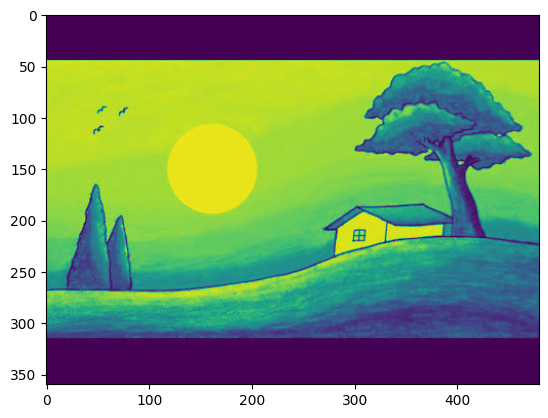

In [18]:
plt.imshow(image_array)

In [19]:
# Step 3: Set 10% of the pixels to zero at random
mask = np.random.rand(*image_array.shape) < 0.1
corrupted_image = image_array.copy()
corrupted_image[mask] = 0



In [20]:
# Step 4: Create a DataFrame with each pixel's value and adjacent pixels
data = []
for i in range(1, corrupted_image.shape[0] - 1):
    for j in range(1, corrupted_image.shape[1] - 1):
        pixel_value = corrupted_image[i, j]
        if pixel_value == 0:  # skip missing pixels in target
            continue
        neighbors = [
            corrupted_image[i-1, j],   # above
            corrupted_image[i+1, j],   # below
            corrupted_image[i, j-1],   # left
            corrupted_image[i, j+1]    # right
        ]
        data.append([pixel_value] + neighbors)


In [24]:
len(data)

122603

In [25]:

# Create a DataFrame
columns = ['target', 'above', 'below', 'left', 'right']
df = pd.DataFrame(data, columns=columns)

# Separate features and target for regression
X = df[['above', 'below', 'left', 'right']]
y = df['target']


In [26]:

# Step 5: Train a linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 817.1360181654055


In [29]:
# Step 6: Predict and fill in the missing pixels in the corrupted image
filled_image = corrupted_image.copy()

# Loop through the image, excluding borders
for i in range(1, filled_image.shape[0] - 1):
    for j in range(1, filled_image.shape[1] - 1):
        # Check if the pixel is missing (set to zero)
        if filled_image[i, j] == 0:
            # Gather the values of adjacent pixels
            neighbors = [
                filled_image[i-1, j],   # above
                filled_image[i+1, j],   # below
                filled_image[i, j-1],   # left
                filled_image[i, j+1]    # right
            ]
            # Convert neighbors list to a DataFrame to match feature names
            neighbors_df = pd.DataFrame([neighbors], columns=['above', 'below', 'left', 'right'])
            # Predict the pixel value using the linear regression model
            predicted_value = model.predict(neighbors_df)[0]
            # Fill the missing pixel with the predicted value
            filled_image[i, j] = predicted_value


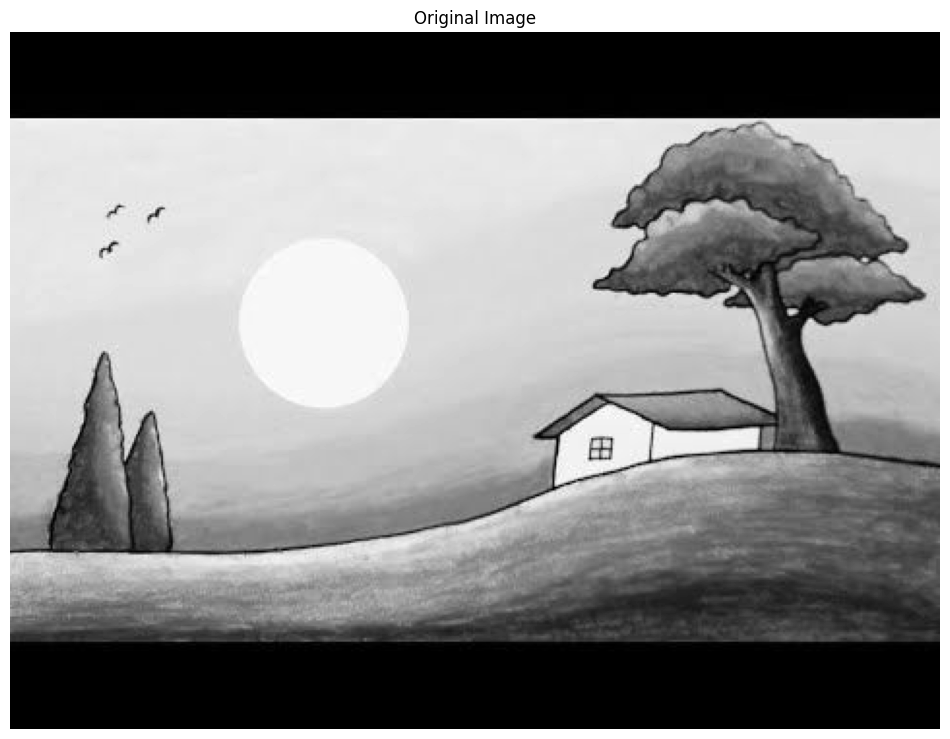

In [34]:

# Display original, corrupted, and filled images

plt.figure(figsize=(12, 14))

# Display the original grayscale image
# plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

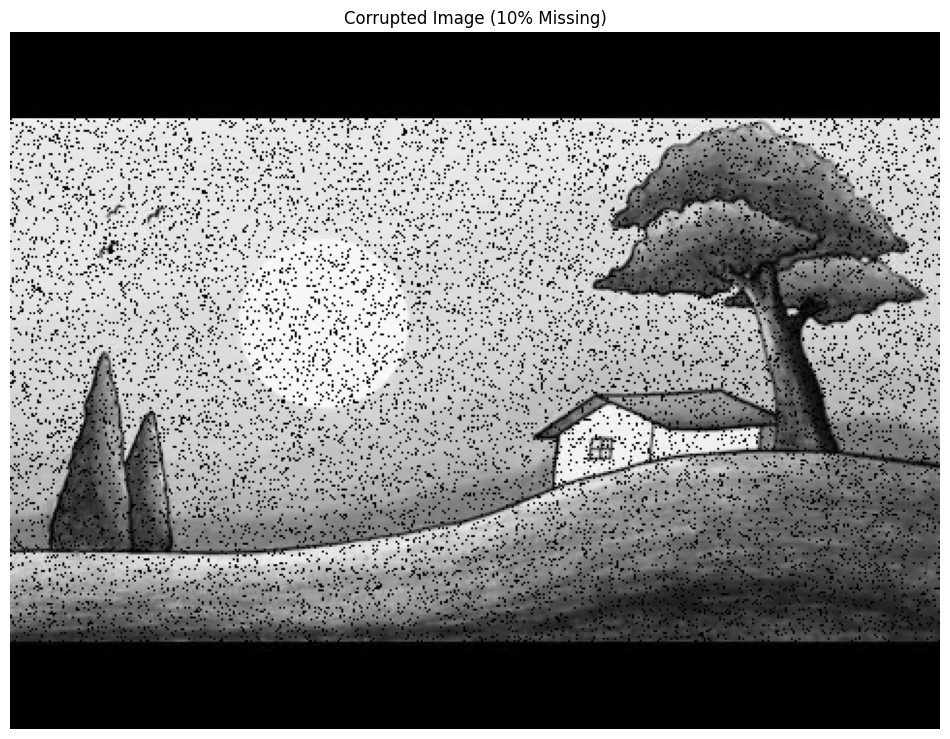

In [38]:
plt.figure(figsize=(12, 14))
# Display the corrupted image
# plt.subplot(1, 3, 2)
plt.title("Corrupted Image (10% Missing)")
plt.imshow(corrupted_image, cmap='gray')
plt.axis('off')
plt.show()

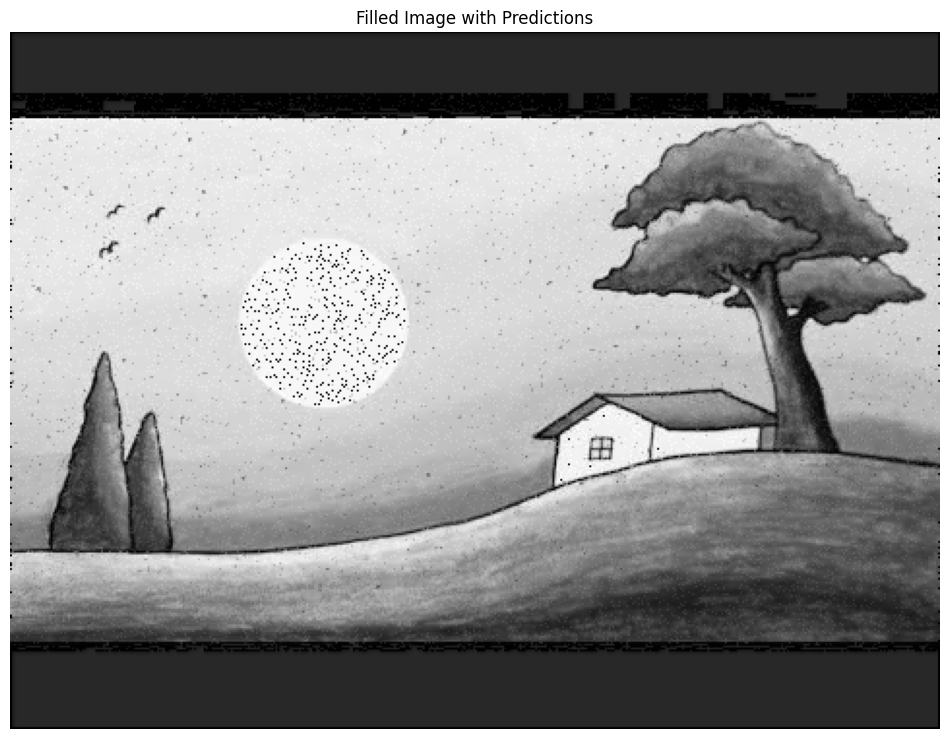

In [40]:
plt.figure(figsize=(12, 14))
# Display the filled image with predicted pixels
# plt.subplot(1, 3, 3)
plt.title("Filled Image with Predictions")
plt.imshow(filled_image, cmap='gray')
plt.axis('off')

plt.show()
